In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Using MPI version 4.0, 1 processes


In [2]:
n = 5          # index of square grating
a = .8            # period 
d = 0.5*a            # side of square
t = 0.2          # thickness of grating
dpml = 1         # PML thickness
pad = 2          # padding between grating and PML

pol = mp.Ex

In [3]:
from meep.materials import Ag

# n=0
block = mp.Block(size=mp.Vector3(d,t), center=mp.Vector3(), material=Ag)
# block = mp.Block(size=mp.Vector3(d,t), center=mp.Vector3(), material=mp.Medium(index=n))

In [4]:
fcen = 1
df = 0.8
nfreqs = 50

src = mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=pol, center=mp.Vector3(y=-t/2-pad+0.1), size=mp.Vector3(a))

In [5]:
cell = mp.Vector3(a, 2*(t/2+pad+dpml))

sim = mp.Simulation(cell_size=cell,
                    default_material=mp.Medium(index=1),
                    geometry=[block],
                    sources=[src],
                    resolution=50,
                    boundary_layers=[mp.PML(dpml, direction=mp.Y)],
                    k_point=mp.Vector3())

refl = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-t/2-pad+0.2), size=mp.Vector3(a,0)))
tran = sim.add_mode_monitor(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=t/2+pad-0.1), size=mp.Vector3(a,0)))

     block, center = (0,0,0)
          size (0.4,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


<AxesSubplot:xlabel='X', ylabel='Y'>

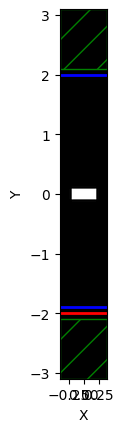

In [6]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 2*(t/2+pad+dpml))))

In [7]:
pt = mp.Vector3(y=t/2+pad) # Point to check field
sim.run(until_after_sources=mp.stop_when_fields_decayed(100, pol, pt, 1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.000583887 s
Working in 2D dimensions.
Computational cell is 0.8 x 6.2 x 0 with resolution 50
     block, center = (0,0,0)
          size (0.4,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0151651 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptibility: frequency=0.658148, gamma=3.13427
drude susceptibility: frequency=1e-10, gamma=0.0387146
-----------
on time step 9854 (time=98.54), 0.00040596 s/step
field decay(t = 100.01): 0.12515678982859743 / 0.12515678982859743 = 1.0
on time step 19840 (time=198.4), 0.000400582 s/step
field decay(t = 200.02): 6.008980089225804e-08 / 0.12515678982859743 = 4.801161884589017e-07
run 0 fi

In [8]:
p1_coeff = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
p2_coeff = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

c1 = np.array([coef[1] for coef in p1_coeff])
c2 = np.array([coef[0] for coef in p2_coeff])
c3 = np.array([coef[0] for coef in p1_coeff])

MPB solved for frequency_1(0,0.6,0) = 0.6 after 7 iters
Dominant planewave for band 1: (0.000000,0.600000,0.000000)
MPB solved for frequency_1(0,0.616327,0) = 0.616327 after 7 iters
Dominant planewave for band 1: (0.000000,0.616327,0.000000)
MPB solved for frequency_1(0,0.632653,0) = 0.632653 after 7 iters
Dominant planewave for band 1: (0.000000,0.632653,0.000000)
MPB solved for frequency_1(0,0.64898,0) = 0.64898 after 8 iters
Dominant planewave for band 1: (0.000000,0.648980,0.000000)
MPB solved for frequency_1(0,0.665306,0) = 0.665306 after 8 iters
Dominant planewave for band 1: (0.000000,0.665306,0.000000)
MPB solved for frequency_1(0,0.681633,0) = 0.681633 after 8 iters
Dominant planewave for band 1: (0.000000,0.681633,0.000000)
MPB solved for frequency_1(0,0.697959,0) = 0.697959 after 8 iters
Dominant planewave for band 1: (0.000000,0.697959,0.000000)
MPB solved for frequency_1(0,0.714286,0) = 0.714286 after 8 iters
Dominant planewave for band 1: (0.000000,0.714286,0.000000)
MPB 

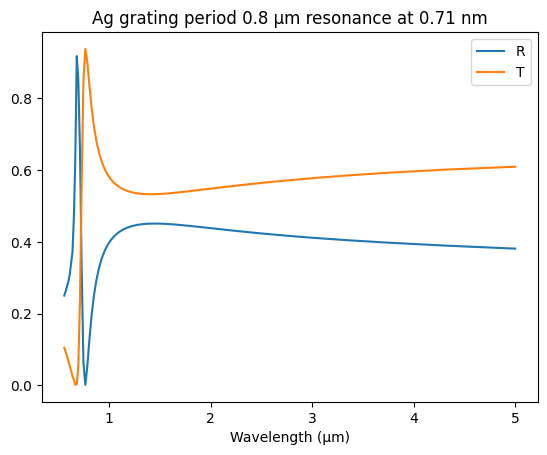

In [9]:
freqs = np.linspace(fcen-df, fcen+df, nfreqs)
wl = 1/freqs
R = np.abs(c1)**2 / np.abs(c3)**2
T = np.abs(c2)**2 / np.abs(c3)**2

res_freq = 0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

plt.plot(wl, R, label='R')
plt.plot(wl, T, label='T')
plt.title('Ag grating period %.1f µm resonance at %.2f nm' % (a, res_freq))
plt.xlabel('Wavelength (µm)')
plt.legend()
title = 'square_grating_%.2fum' % res_freq
# plt.savefig('results/'+title+'.png')

In [10]:
0.5*(wl[np.argmax(T)]+wl[np.argmin(T)])

0.7135982574779018

     block, center = (0,0,0)
          size (0.4,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

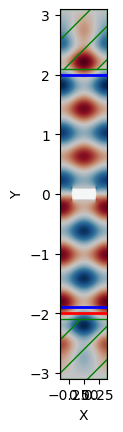

In [11]:
sim.plot2D(fields=pol, output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(a, 2*(t/2+pad+dpml))))